In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:

x_train = pd.read_csv('x_train_all.csv')
y_train = pd.read_csv('y_train_all.csv')
x_test = pd.read_csv('x_test_all.csv')
y_test = pd.read_csv('y_test_all.csv')

In [3]:
x_arr=np.array(x_train)
y_arr=np.array(y_train)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('x_train_all.csv')
datatype = pd.read_csv('y_train_all.csv')
X1 = data.iloc[:,0:2304]  #independent columns
y1 = datatype.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScoresAll2 = featureScores.nlargest(2,'Score')
featureScoresAll2

,Specs,Score
1263,1263,150633.369191
1264,1264,148051.674998


In [5]:
def get_best_feature_dataframe(index_X, data):
    arr = index_X.to_numpy()[:,0]    
    return data.loc[:,arr]



In [6]:
feature_df = get_best_feature_dataframe(featureScoresAll2,x_train)
XTArrBest  = feature_df.to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XTArrBest, y_arr, test_size=0.25, random_state=0)

In [8]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [18]:
X_pca=pca = PCA(n_components=71)
X_pca = pca.fit_transform(x_train)
X_pca

array([[ 1833.67865378,  -327.4322801 ,  -247.74319017, ...,
          -25.69612378,    -6.56408861,   -38.97535179],
       [ 1859.00701879,  -349.97715693,  -192.22228358, ...,
          -95.83025788,    42.93807947,   -66.59064753],
       [ 1764.50988089,  -388.61402428,  -133.03424789, ...,
          -28.95873973,   -84.38717355,    -8.91381656],
       ...,
       [  985.8645514 ,  1719.21149187, -1749.45504223, ...,
          260.92749693,   -18.24550559,  -178.37737697],
       [ 1180.69457138,  1818.1785203 , -1816.04025282, ...,
            9.63154935,    41.53887775,  -133.86278674],
       [  564.08876036,  1545.22278045,  -854.69771934, ...,
         -106.50469125,    20.56011977,  -163.71954528]])

In [38]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialize hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(X_train_norm)
    
    # Calculate Silhouette score for each number of clusters
    silhouette_avg.append(silhouette_score(X_train_norm, cluster_labels))


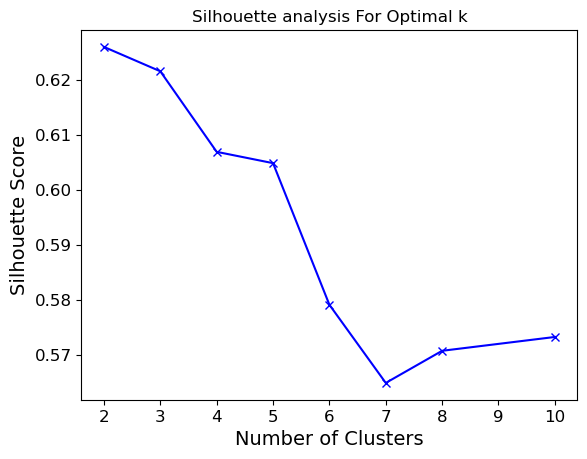

In [39]:
# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg, '-bx')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()


In [101]:
h_cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5)
h_cluster.fit_predict(X_train_norm)


C:\Users\ajiks\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 3, 1, ..., 3, 3, 4], dtype=int64)

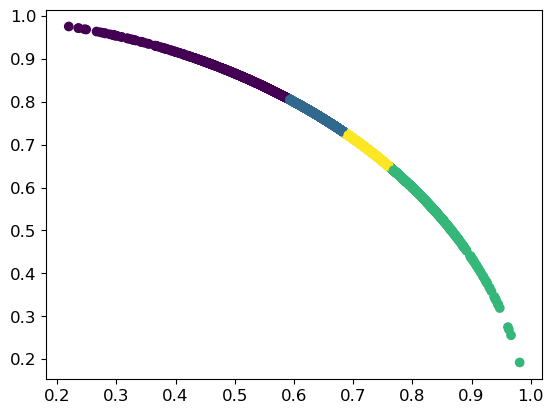

In [65]:
labels=h_cluster.labels_
plt.scatter(X_train_norm[:,0], X_train_norm[:,1],c=labels)
plt.show()

In [66]:
silhouette_score(X_train_norm, h_cluster.labels_)

0.6068860240836919

In [56]:
# calinski_harabasz_score
from sklearn.metrics import calinski_harabasz_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10]
calinski_scores = []

for num_clusters in range_n_clusters:
    # Initialize hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(X_train_norm)
    
    # Calculate Calinski-Harabasz score for each number of clusters
    calinski_scores.append(calinski_harabasz_score(X_train_norm, cluster_labels))


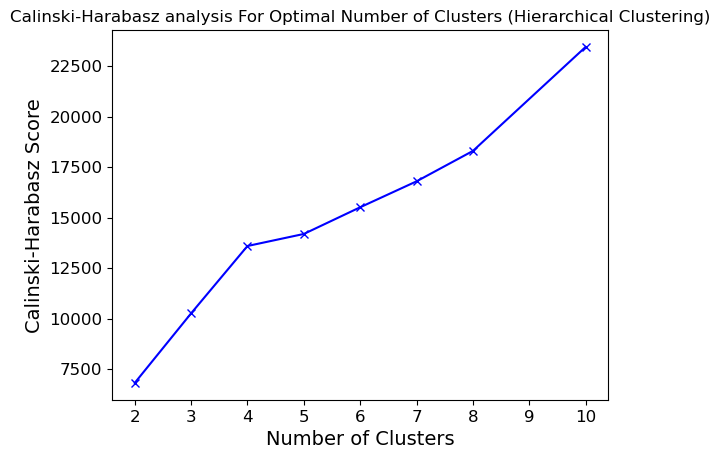

In [57]:
plt.plot(range_n_clusters, calinski_scores, '-bx')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz analysis For Optimal Number of Clusters (Hierarchical Clustering)')
plt.show()

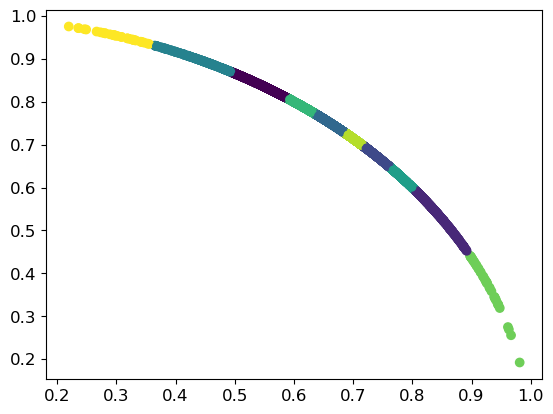

In [69]:
calinski_harabasz_score(X_train_norm, h_cluster.labels_)

14187.70978904572

In [71]:
#davies_bouldin_score:
from sklearn.metrics import davies_bouldin_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10]
davies_bouldin_scores = []

for num_clusters in range_n_clusters:
    # Initialize hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(X_train_norm)
    
    # Calculate Davies-Bouldin score for each number of clusters
    davies_bouldin_scores.append(davies_bouldin_score(X_train_norm, cluster_labels))

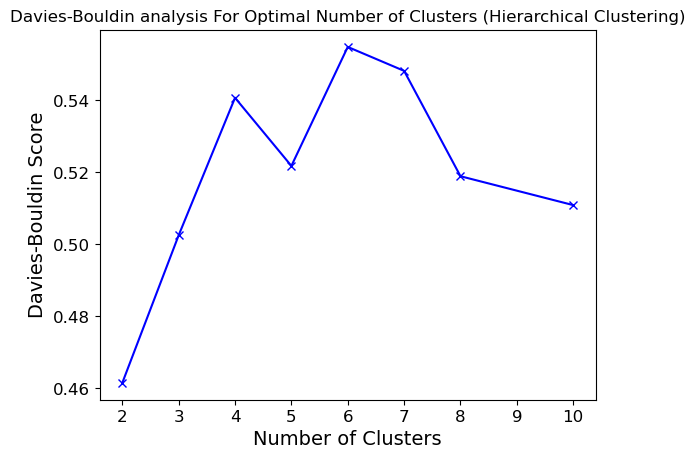

In [72]:
plt.plot(range_n_clusters, davies_bouldin_scores, '-bx')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin analysis For Optimal Number of Clusters (Hierarchical Clustering)')
plt.show()

In [87]:
davies_bouldin_score(X_train_norm, h_cluster.labels_)

0.5109083769275429

In [90]:
#adjusted_rand_score:
from sklearn.metrics import adjusted_rand_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10]
ari_scores = []
y_train_new = y_train.ravel()

# Assuming y_train contains the true labels
for num_clusters in range_n_clusters:
    # Initialize hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(X_train_norm)
    
    # Calculate Adjusted Rand Index for each number of clusters
    ari_scores.append(adjusted_rand_score(y_train_new, cluster_labels))

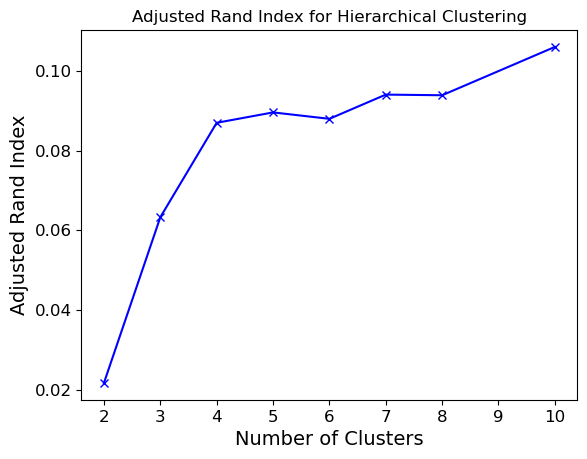

In [91]:
plt.plot(range_n_clusters, ari_scores, '-bx')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Hierarchical Clustering')
plt.show()

In [102]:
adjusted_rand_score(y_train_new, h_cluster.labels_)

0.08956279309772854

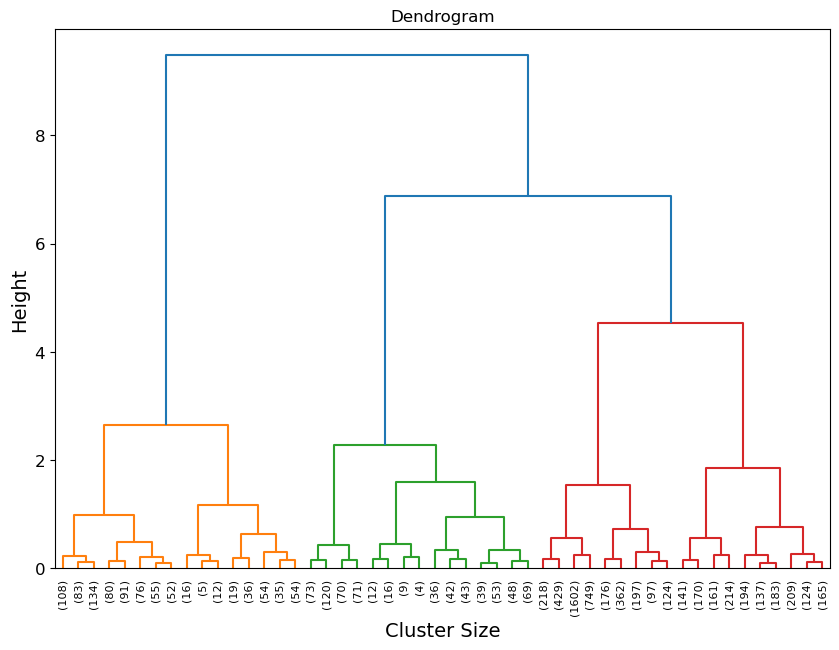

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X_train_norm, method='ward'), 
                      truncate_mode='lastp',  # Truncate the labels
                      p=50,  # Display 50 labels on the x-axis
                      show_leaf_counts=True)  # Show the count of items in each cluster

plt.xlabel("Cluster Size")
plt.ylabel("Height")
plt.show()